# Linear and Logistic Regression

These notes aim to capture some mathematical and probabilistic insights into linear conditional models: Linear and Logistic Regression. This intuition can also be useful in interpreting deep learning models. 

Model the probability distribution of the response $y_i \in \mathbb{R}$ conditional on the input feature vector $x_i \in \mathbb{R}^{d \times 1}$:

$p(y_i \ | \ x_i, w)$,

where $w  \in \mathbb{R}^{d \times 1}$ are the parameters of the model.

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.dpi'] = 100

## The Conditional Distributions

When $y_i$ is a continuous random variable, a linear regression models the conditional probability distribution as a Gaussian distribution:
$p(y_i \ | \ x_i, w) = \frac{1}{\sqrt{2 π}} exp\big({-\frac{(y_i - x_i^T w)^2}{2}}\big)$.

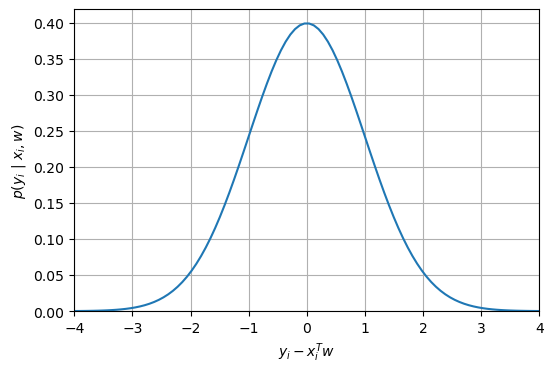

In [2]:
def gaussian_cond_distr(eps):
    """
    eps: The residuals y_i - x^T w_i
    """
    return 1/np.sqrt(2*np.pi) * np.exp(-eps**2/2)

eps = np.linspace(-4, 4, 100)
cond_distr = gaussian_cond_distr(eps)

plt.figure()
plt.plot(eps, cond_distr)
plt.xlim(-4, 4)
plt.ylim(0)
plt.xlabel(r'$y_i - x_i^T w$')
plt.ylabel(r'$p(y_i \ | \ x_i, w)$')
plt.grid()

When $y_i$ is a Bernoulli random variable, a logistic regression models the conditional probability mass function as:
$p(y_i \ | \ x_i, w) = [\sigma(x_i^T w)]^{y_i} \ [1-\sigma(x_i^T w)]^{1-y_i} = [\sigma(x_i^T w)]^{y_i} \ [\sigma(-x_i^T w)]^{1-y_i}$,

where $\sigma$ is the sigmoid function.

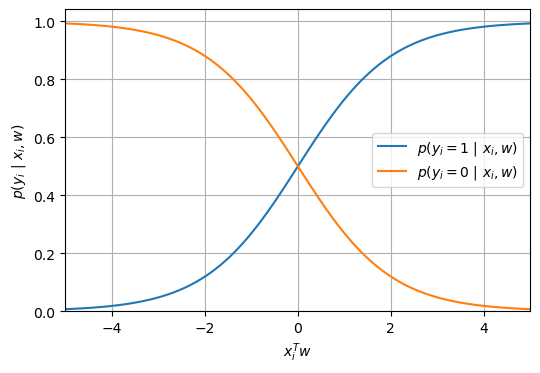

In [3]:
def sigmoid(xw):
    return 1 / (1 + np.exp(-xw))

xw = np.linspace(-5, 5, 100)
p_1_distr = sigmoid(xw)
p_0_distr = 1 - sigmoid(xw)

plt.figure()
plt.plot(xw, p_1_distr, label=r'$p(y_i=1 \ | \ x_i, w)$')
plt.plot(xw, p_0_distr, label=r'$p(y_i=0 \ | \ x_i, w)$')
plt.xlim(-5, 5)
plt.ylim(0)
plt.xlabel(r'$x_i^T w$')
plt.ylabel(r'$p(y_i \ | \ x_i, w)$')
plt.legend()
plt.grid()

## Prior
We can also place a prior on the weights $w$. A Gaussian prior with variance $\frac{1}{\lambda}$ on a component of weight $w_j$ would look like:

$p(w_j \ | \ \lambda) \propto exp\Big({-w_j^2\frac{\lambda}{2}}\Big)$.

Thus:

$p(w \ | \ \lambda) = \displaystyle\prod_j p(w_j \ | \ \lambda) \propto exp\Big({-\lvert \lvert w\lvert \lvert^2_2 \frac{\lambda}{2}}\Big)$.

The strength of parameter $\lambda$ determines the prior probability distribution of the weights as shown in the plot below. This parameter will play the role of the regularisation parameter, and it can already be seen how the strength of this parameter affects the prior probability distribution of the weights.

In [4]:
def gaussian_prior(w, lmbda):
    return np.sqrt(lmbda/(2*np.pi)) * np.exp(-w**2 * lmbda/2)

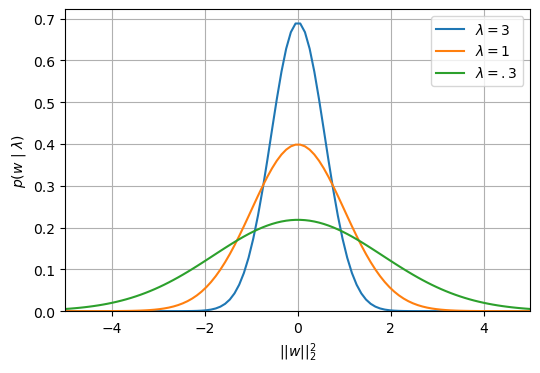

In [5]:
w = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(w, gaussian_prior(w, 3), label=r"$\lambda=3$")
plt.plot(w, gaussian_prior(w, 1), label=r"$\lambda=1$")
plt.plot(w, gaussian_prior(w, .3), label=r"$\lambda=.3$")
plt.xlim(-5, 5)
plt.ylim(0)
plt.xlabel(r'$||w||^2_2$')
plt.ylabel(r'$p(w \ | \ \lambda)$')
plt.legend()
plt.grid()

## The Posterior Distribution and The Loss Function

Using Bayes rule:

$p(w \ | \ \mathbf{y}, \mathbf{x}, \lambda) \propto p(\mathbf{y} \ | \ \mathbf{x}, w, \lambda) \times p(w \ | \lambda) $,

where $\mathbf{x}$ and $\mathbf{y}$ represent the dataset. The model can be fit using Maximum a posteriori (MAP) estimation, which involves finding the mode of the posterior distribution:

$\hat{w} \in \text{argmax}_w \ p(w \ | \ \mathbf{y}, \mathbf{x}, \lambda)$.

Taking the log of the posterior:

$\ln p(w \ | \ \mathbf{y}, \mathbf{x}, \lambda) = \ln p(\mathbf{y} \ | \ \mathbf{x}, w, \lambda) + \ln p(w \ | \lambda) + \text{constants}$.

This can be simplified as the data samples are independent:

$\ln p(w \ | \ \mathbf{y}, \mathbf{x}, \lambda) = \displaystyle\sum_i \ln p(y_i \ | \ x_i, w, \lambda) + \ln p(w \ | \lambda) + \text{constants}$.

The loss function is negative of the above equation. Dropping constants:

$L = - \displaystyle\sum_i \ln p(y_i \ | \ x_i, w, \lambda) - \ln p(w \ | \lambda)$.


$L_{reg} = \frac{1}{2} \displaystyle\sum_i (y_i - x_i^T w)^2 + \frac{\lambda}{2} \lvert \lvert w\lvert \lvert^2_2$

$L_{log} = -\frac{1}{2} \displaystyle\sum_i y_i \ln \sigma(x_i^T w) +  (1-y_i) \ln \sigma(-x_i^T w)+ \frac{\lambda}{2} \lvert \lvert w\lvert \lvert^2_2$

The parameters $\hat{w}$ can be determined by minimising the loss function, which is equivalent to finding the mode of the posterior distribution:

$\hat{w} \in \text{argmin}_w L$

In [6]:
# Loss
def L_regr(X, y, w, lmbda):
    Xw = np.squeeze(np.dot(X, w))
    return 0.5 * np.sum((y - Xw)**2) + 0.5 * lmbda * np.sum(w**2)

def L_logr(X, y, w, lmbda):
    Xw = np.squeeze(np.dot(X, w))
    return -0.5 * np.sum(y * np.log(sigmoid(Xw)) + (1 - y) * np.log(sigmoid(-Xw))) + 0.5 * lmbda * np.sum(w**2)

## Generate Dataset

In order to visualise the loss functions, a dataset is needed.

In [7]:
# Generate random features from a uniform distribution.
n = 25
d = 2
X = np.random.uniform(-5, 5, size=[n, d])

# Fix 'true' weights
w_true = np.array([-2.5, 1.8])

# Generate 'true' responses
Xw = np.squeeze(np.dot(X, w_true))
y_regr = np.random.normal(loc=Xw, scale=1, size=n) # sample from a Gaussian distribution
y_logr = np.random.binomial(n=1, p=sigmoid(Xw), size=n) # sample from a Bernoulli distribution. The Bernoulli distribution is a special case of the binomial distribution where n = 1.

## Visualise the Loss Function

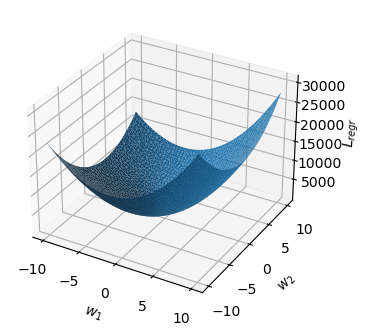

In [9]:
w_1 = np.linspace(-10, 10, 50)
w_2 = np.linspace(-10, 10, 50)

w = []
L_regr_values = []

for i in range(len(w_1)):
    for j in range(len(w_2)):
        w.append([w_1[i], w_2[j]])
        L_regr_values.append( 
            L_regr(X, y_regr, np.array([w_1[i], w_2[j]]), lmbda=1)
        )

w = np.array(w)
L_regr_values = np.array(L_regr_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_zlabel(r'$L_{regr}$')
ax.plot_trisurf(w[:,0], w[:,1], L_regr_values) 

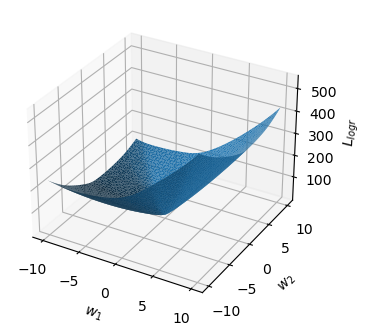

In [10]:
w_1 = np.linspace(-10, 10, 50)
w_2 = np.linspace(-10, 10, 50)

w = []
L_logr_values = []

for i in range(len(w_1)):
    for j in range(len(w_2)):
        w.append([w_1[i], w_2[j]])
        L_logr_values.append( 
            L_logr(X, y_logr, np.array([w_1[i], w_2[j]]), lmbda=1)
        )

w = np.array(w)
L_logr_values = np.array(L_logr_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_zlabel(r'$L_{logr}$')
ax.plot_trisurf(w[:,0], w[:,1], L_logr_values)

## Convexity

The loss functions for both cases are convex, which is evident graphically. It can also be proven mathematically.

Linear Regression:

$ \nabla_w L_{reg} = \displaystyle\sum_i (x_i^T w - y_i) x_i + \lambda w$

$ \nabla^2_w L_{reg} =  \displaystyle\sum_i x_i x_i^T + \mathbf{I} \lambda = \mathbf{x}^T \mathbf{x} + \mathbf{I} \lambda \succcurlyeq 0$

Logistic Regression:

$ \nabla_w L_{log} = \displaystyle\sum_i (\sigma(x_i^T w) - y_i) x_i + \lambda w$

$ \nabla^2_w L_{log} = \displaystyle\sum_i x_i x_i^T \sigma(x_i^T w) (1-\sigma(x_i^T w)) + \mathbf{I} \lambda = \mathbf{x}^T \mathbf{\Sigma} \mathbf{x} + \mathbf{I}\lambda \succcurlyeq 0$

where $\mathbf{\Sigma}$ is a diagonal matrix with non-negative entries.

If the Hessian of a twice-differentiable function is positive-semidefinite, then the function is convex.

## Loss Function and Regularisation Strength

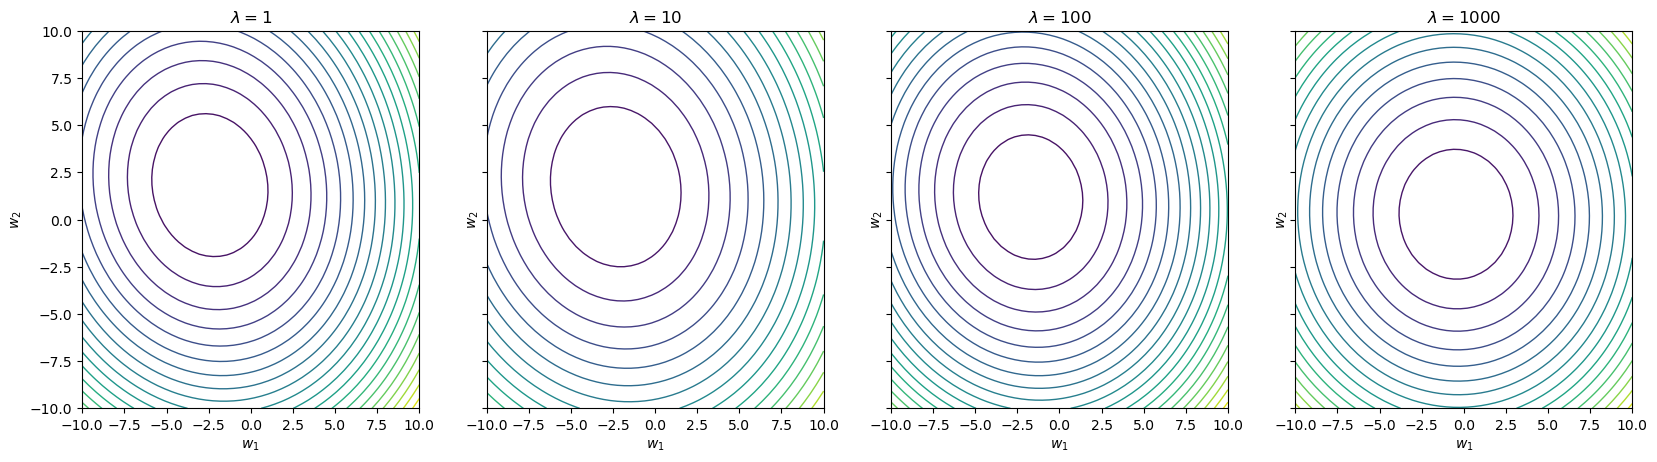

In [12]:
lmbdas = [1, 10, 100, 1000]
w_1 = np.linspace(-10, 10, 50)
w_2 = np.linspace(-10, 10, 50)

fig, ax_plots = plt.subplots(1, len(lmbdas), figsize=(5*len(lmbdas),5), sharey=True)


for lmbda, ax in zip(lmbdas, ax_plots):
    w = []
    L_regr_values = []

    for i in range(len(w_1)):
        for j in range(len(w_2)):
            w.append([w_1[i], w_2[j]])
            L_regr_values.append( 
                L_regr(X, y_regr, np.array([w_1[i], w_2[j]]), lmbda=lmbda)
            )

    w = np.array(w)
    L_regr_values = np.array(L_regr_values)

    ax.tricontour(w[:,0], w[:,1], L_regr_values, 20, linewidths=1)
    ax.set_title(fr'$\lambda={lmbda}$')
    ax.set_xlabel(r'$w_1$')
    ax.set_ylabel(r'$w_2$')

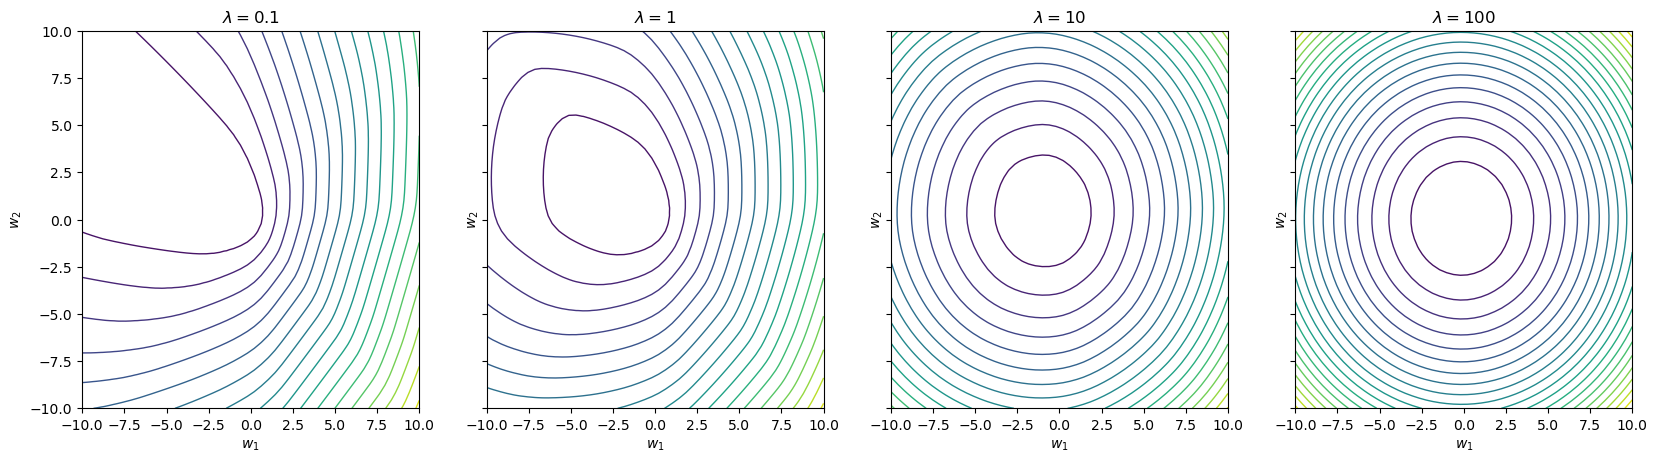

In [13]:
lmbdas = [.1, 1, 10, 100]
w_1 = np.linspace(-10, 10, 50)
w_2 = np.linspace(-10, 10, 50)

fig, ax_plots = plt.subplots(1, len(lmbdas), figsize=(5*len(lmbdas), 5), sharey=True)


for lmbda, ax in zip(lmbdas, ax_plots):
    w = []
    L_logr_values = []

    for i in range(len(w_1)):
        for j in range(len(w_2)):
            w.append([w_1[i], w_2[j]])
            L_logr_values.append( 
                L_logr(X, y_logr, np.array([w_1[i], w_2[j]]), lmbda=lmbda)
            )

    w = np.array(w)
    L_logr_values = np.array(L_logr_values)

    ax.tricontour(w[:,0], w[:,1], L_logr_values, 20, linewidths=1)
    ax.set_title(fr'$\lambda={lmbda}$')
    ax.set_xlabel(r'$w_1$')
    ax.set_ylabel(r'$w_2$')

## Inference

For a new data point $x'$, the predicted response $y'$ can be estimated by calculating the mode of conditional distribution:

$y' = \text{argmax}_y p(y \ | \ x', \hat{w})$

Linear Regression:

\begin{equation}
y' = x'^T \hat{w}
\end{equation}


Logistic Regression:

\begin{equation}
y' = 
\begin{cases}
    1,& \text{if } x_i^T w > 0\\
    0,              & \text{otherwise}
\end{cases}
\end{equation}

The confidence of the predictions can also be deduced from the conditional distribution.

Linear Regression:

Prob. of predicted response to lie between ${y_1}$ and ${y_2}$ = $\displaystyle\int_{y_1}^{y_2} p(y \ | \ x', \hat{w}) dy$


Logistic Regression:

Prob. of predicted response to be $1 = \sigma(x_i^T w)$

Prob. of predicted response to be $0 = \sigma(-x_i^T w)$


## References

The Elements of Statistical Learning (2nd edition) by Hastie, Tibshirani and Friedman (2009)

https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function

https://math.stackexchange.com/questions/2083629/why-does-positive-semi-definiteness-imply-convexity